# SALES REINFORCER

## CONTEXT 

The client is based in the Education industry working with various startups, SMEs and enterprises. Their main service is to offer brand new services to customers from around the world and help them upskill. The platform is being used by thousands of users and our organization keeps on growing every month.

The client aims to to impact tens of thousands of lives and help them benefit from the opportunities via the offered services. The sales team is looking for ways to first understand the underlying patterns in the client's native CRM data, second optimize the user acquisition pipeline to improve the company’s sales funnel with the ultimate goal to create the best user experience for the customers worldwide.

## METHODOLOGY
- Design and develop a Reinforcement Learning agent to optimize the user acquisition pipeline that helps discover the optimal attributes/steps/actions to increase overall sales.
- Solve the feature selection problem using a Reinforcement Learning approach where the state space comprises all possible subsets of the features and actions that is included in the provided dataset.

## PROJECT GOAL(S)
- Understanding who should the sales team be getting in touch with, for instance to understand the best customer segment we should be focusing on by optimizing the reward, such as people who has “Bachelors”, is “Full Time Employed”, Residing in “USA” with Training “X” would more likely to subscribe or would more likely to schedule calls.

- What are the best actions leading to more subscriptions, or calls? 


In [1]:
# import data analysis libraries  
import numpy as np
import pandas as pd
import math
import random
import os

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# RL tools
import gymnasium as gym
# from stable_baselines3 import DQN

print("installed all dependencies...")

installed all dependencies...


## DATA QUALITY CHECKS

In [2]:
data = pd.read_csv('SalesCRM.csv')
data.head()

,ID,Country,Education,First Contact,Last Contact,Status,Stage,First Call,Signed up for a demo,Filled in customer survey,Did sign up to the platform,Account Manager assigned,Subscribed
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-27,NaN,NaN
1,2,Austria,NaN,NaN,NaN,NaN,NaN,2022-04-28,2022-04-25,2022-04-25,2022-04-25,NaN,NaN
2,3,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-24,NaN,NaN,NaN,NaN
3,4,France,NaN,NaN,NaN,NaN,NaN,2022-04-22,2022-04-20,2022-04-20,2022-04-22,2022-04-22,NaN
4,5,USA,NaN,NaN,NaN,NaN,NaN,2022-04-23,2022-04-19,2022-04-19,NaN,NaN,NaN


In [3]:
data.shape

(11032, 13)

In [4]:
data.dtypes

ID                              int64
Country                        object
Education                      object
First Contact                  object
Last Contact                   object
Status                         object
Stage                          object
First Call                     object
Signed up for a demo           object
Filled in customer survey      object
Did sign up to the platform    object
Account Manager assigned       object
Subscribed                     object
dtype: object

In [5]:
data.isna().sum()

ID                                 0
Country                          891
Education                       3603
First Contact                    715
Last Contact                     310
Status                           803
Stage                          10088
First Call                     10591
Signed up for a demo           10749
Filled in customer survey      10848
Did sign up to the platform    10609
Account Manager assigned       10961
Subscribed                     10984
dtype: int64

In [6]:
_dict = {}
for col in data.columns.tolist():
    _dict[col] =[data[col].nunique()] 
pd.DataFrame(_dict)

,ID,Country,Education,First Contact,Last Contact,Status,Stage,First Call,Signed up for a demo,Filled in customer survey,Did sign up to the platform,Account Manager assigned,Subscribed
0,11032,103,30,346,451,3,6,242,125,97,189,52,44


In [7]:
data.Subscribed.value_counts()

Subscribed
2022-04-16    3
2021-12-30    2
2021-12-14    2
2021-12-01    1
2021-09-25    1
2021-12-02    1
2022-01-18    1
2022-02-14    1
2021-05-03    1
2022-01-06    1
2021-02-27    1
2021-06-24    1
2021-06-28    1
2021-02-04    1
2020-12-17    1
2021-04-13    1
2021-09-30    1
2021-08-20    1
0000-00-00    1
2021-09-27    1
2021-09-05    1
2022-02-02    1
2021-05-23    1
2021-07-18    1
2022-04-27    1
2020-09-15    1
2022-04-18    1
2022-04-07    1
2022-02-21    1
2022-02-25    1
2022-03-14    1
2022-02-08    1
2022-01-31    1
2022-02-12    1
2022-01-15    1
2021-12-26    1
2022-01-16    1
2021-12-08    1
2021-11-21    1
2021-10-28    1
2021-11-22    1
2020-10-01    1
2020-11-11    1
2022-02-24    1
Name: count, dtype: int64

In [8]:
data.groupby(['Stage'])['Subscribed'].apply(lambda x: x.isna().mean())

Stage
declined/canceled call    1.000000
did not join the call     1.000000
do not contact            1.000000
interested                1.000000
not interested            1.000000
subscribed already        0.043478
Name: Subscribed, dtype: float64

In [9]:
def map_subscription(row):
    if row['Stage'] == 'subscribed already':
        return 1
    else:
        return 0

data['Subscribed_flag'] = data.apply(map_subscription, axis=1)

In [10]:
data.head()

,ID,Country,Education,First Contact,Last Contact,Status,Stage,First Call,Signed up for a demo,Filled in customer survey,Did sign up to the platform,Account Manager assigned,Subscribed,Subscribed_flag
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-27,NaN,NaN,0
1,2,Austria,NaN,NaN,NaN,NaN,NaN,2022-04-28,2022-04-25,2022-04-25,2022-04-25,NaN,NaN,0
2,3,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-24,NaN,NaN,NaN,NaN,0
3,4,France,NaN,NaN,NaN,NaN,NaN,2022-04-22,2022-04-20,2022-04-20,2022-04-22,2022-04-22,NaN,0
4,5,USA,NaN,NaN,NaN,NaN,NaN,2022-04-23,2022-04-19,2022-04-19,NaN,NaN,NaN,0


In [11]:
data['Subscribed_flag'].value_counts(normalize=True)

Subscribed_flag
0    0.99583
1    0.00417
Name: proportion, dtype: float64

In [12]:
data['Subscribed_flag'].value_counts()

Subscribed_flag
0    10986
1       46
Name: count, dtype: int64

In [13]:
from sklearn.utils import resample

subscribed = data[data['Subscribed_flag'] == 1]
not_subscribed = data[data['Subscribed_flag'] == 0]

# Upsample subscribed users to balance counts
subscribed_upsampled = resample(subscribed, 
                                replace=True, 
                                n_samples=len(not_subscribed)//10, # mild balancing
                                random_state=42)

data_balanced = pd.concat([not_subscribed, subscribed_upsampled])

In [14]:
data_balanced

,ID,Country,Education,First Contact,Last Contact,Status,Stage,First Call,Signed up for a demo,Filled in customer survey,Did sign up to the platform,Account Manager assigned,Subscribed,Subscribed_flag
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-27,NaN,NaN,0
1,2,Austria,NaN,NaN,NaN,NaN,NaN,2022-04-28,2022-04-25,2022-04-25,2022-04-25,NaN,NaN,0
2,3,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-24,NaN,NaN,NaN,NaN,0
3,4,France,NaN,NaN,NaN,NaN,NaN,2022-04-22,2022-04-20,2022-04-20,2022-04-22,2022-04-22,NaN,0
4,5,USA,NaN,NaN,NaN,NaN,NaN,2022-04-23,2022-04-19,2022-04-19,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,7768,NaN,NaN,2020-05-13,2020-05-13,NaN,subscribed already,2021-03-18,NaN,NaN,2021-03-17,2021-03-31,2021-04-13,1
112,113,NaN,NaN,NaN,NaN,NaN,subscribed already,2022-01-17,2022-01-15,2022-01-15,NaN,2022-01-26,2022-01-31,1
120,121,USA,NaN,NaN,NaN,NaN,subscribed already,2022-01-08,2022-01-05,2022-01-06,2022-01-06,2022-01-10,2022-01-15,1
363,366,USA,B11,2021-06-23,2021-06-23,2nd message,subscribed already,2021-06-28,NaN,NaN,2021-06-28,2021-07-19,2021-07-18,1


In [15]:
data_balanced['Subscribed_flag'].value_counts()

Subscribed_flag
0    10986
1     1098
Name: count, dtype: int64

## FEATURE ENGINEERING

In [16]:
features = data_balanced.drop(['ID', 'Subscribed', 'Subscribed_flag'], axis=1).columns.tolist()
target = 'Subscribed_flag'

from sklearn.preprocessing import LabelEncoder

encoded_data = data_balanced.copy()
encoders = {}

for col in features:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))
    encoders[col] = le

In [17]:
from sklearn.feature_selection import mutual_info_classif

X = encoded_data[features]
y = encoded_data[target]

mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=42)
mi_df = pd.Series(mi_scores, index=features).sort_values(ascending=False).round(3)
print("Mutual Information Scores:")
print(mi_df)

Mutual Information Scores:
Stage                          0.305
First Call                     0.295
Account Manager assigned       0.277
Did sign up to the platform    0.275
Last Contact                   0.194
Filled in customer survey      0.161
First Contact                  0.159
Signed up for a demo           0.156
Status                         0.068
Education                      0.042
Country                        0.036
dtype: float64


In [18]:
from sklearn.feature_selection import chi2

chi_scores, p_values = chi2(X, y)
chi_df = pd.Series(chi_scores, index=features).sort_values(ascending=False).round(3)
print("\n Chi-Squared Scores:")
print(chi_df)


 Chi-Squared Scores:
Last Contact                   48757.914
First Call                     37318.442
Did sign up to the platform    31524.983
First Contact                  30270.971
Signed up for a demo           18011.716
Filled in customer survey      15822.807
Account Manager assigned       14570.109
Status                          3079.548
Education                       1618.053
Stage                            949.043
Country                           54.975
dtype: float64


In [19]:
encoded_data

,ID,Country,Education,First Contact,Last Contact,Status,Stage,First Call,Signed up for a demo,Filled in customer survey,Did sign up to the platform,Account Manager assigned,Subscribed,Subscribed_flag
0,1,101,30,346,451,3,4,242,125,97,186,52,NaN,0
1,2,5,30,346,451,3,4,241,124,96,185,52,NaN,0
2,3,95,30,346,451,3,4,242,123,97,189,52,NaN,0
3,4,31,30,346,451,3,4,238,122,95,184,51,NaN,0
4,5,92,30,346,451,3,4,239,121,94,189,52,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,7768,101,30,2,36,3,6,70,125,97,57,6,2021-04-13,1
112,113,101,30,346,451,3,6,196,71,53,189,37,2022-01-31,1
120,121,92,30,346,451,3,6,194,65,48,145,33,2022-01-15,1
363,366,92,2,191,232,1,6,126,125,97,100,11,2021-07-18,1


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

optimal_features = [
    'Stage',
    'First Call',
    'Account Manager assigned',
    'Did sign up to the platform',
    'Last Contact',
    'Filled in customer survey',
    'Signed up for a demo'
]

X_1 = encoded_data[optimal_features]
y_1 = encoded_data['Subscribed_flag']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_1)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## USER ACQUISITION PIPELINE

In [21]:
import gymnasium as gym
from gymnasium import spaces
import random

ACTIONS = [
    "do_nothing",
    "send_demo_invite",
    "assign_account_manager",
    "schedule_first_call",
    "send_survey",
    "nudge_platform_signup",
]

class UserAcquisitionEnv(gym.Env):
    def __init__(self, X, y):
        super(UserAcquisitionEnv, self).__init__()
        self.X = np.array(X)
        self.y = np.array(y)
        self.n_samples = self.X.shape[0]
        self.current_index = 0
        
        # 6 discrete marketing actions
        self.action_space = spaces.Discrete(6)
        # Observation space
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.X.shape[1],), dtype=np.float32
        )
    
    def reset(self, seed=None, options=None):
        self.current_index = np.random.randint(0, self.n_samples)
        state = self.X[self.current_index]
        return state, {}
    
    def step(self, action):
        subscribed = self.y[self.current_index]
        
        # Reward shaping (simulated behavior)
        if subscribed == 1:
            reward = 1.0 if action in [1, 2, 3, 5] else 0.2
        else:
            reward = -0.1 if action in [1, 2, 3, 5] else 0.0

        # UPDATE: Add small penalty for inaction
        if action == 0:   # "do_nothing"
            reward -= 0.20
        
        # Next random user
        self.current_index = np.random.randint(0, self.n_samples)
        next_state = self.X[self.current_index]
        done = False
        return next_state, reward, done, False, {}



## REINFORCEMENT LEARNING AGENT

In [22]:
class QLearningAgent:
    def __init__(self, n_actions, n_bins=10, alpha=0.1, gamma=0.95, epsilon=0.1):
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_bins = n_bins
        self.q_table = {}
    
    def _discretize(self, state):
        # Round each feature to nearest bin step to reduce state complexity
        return tuple(np.round(state, 1))
    
    def choose_action(self, state):
        state_key = self._discretize(state)
        if random.random() < self.epsilon or state_key not in self.q_table:
            return random.randint(0, self.n_actions - 1)
        return np.argmax(self.q_table[state_key])
    
    def update(self, state, action, reward, next_state):
        s_key = self._discretize(state)
        ns_key = self._discretize(next_state)
        
        if s_key not in self.q_table:
            self.q_table[s_key] = np.zeros(self.n_actions)
        if ns_key not in self.q_table:
            self.q_table[ns_key] = np.zeros(self.n_actions)
        
        old_value = self.q_table[s_key][action]
        next_max = np.max(self.q_table[ns_key])
        new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.gamma * next_max)
        self.q_table[s_key][action] = new_value


In [23]:
env = UserAcquisitionEnv(X_train, y_train)
agent = QLearningAgent(n_actions=env.action_space.n)

n_episodes = 5000
rewards = []

for episode in range(n_episodes):
    state, _ = env.reset()
    total_reward = 0
    
    for _ in range(20):  # limited steps per episode
        action = agent.choose_action(state)
        next_state, reward, done, _, _ = env.step(action)
        agent.update(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        if done:
            break
    
    rewards.append(total_reward)

print(f"Average Reward: {np.mean(rewards[-100:]):.3f}")


Average Reward: 1.293


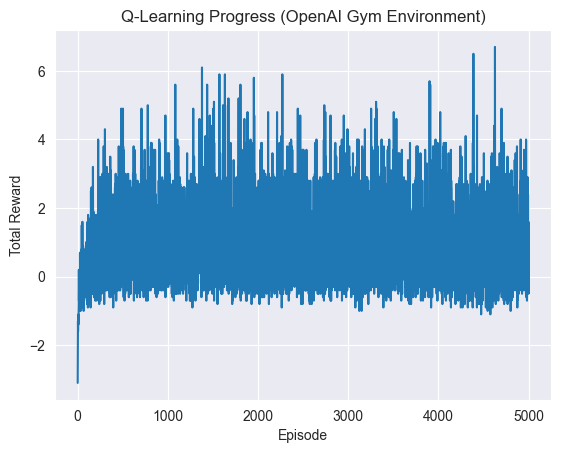

In [24]:
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Progress (OpenAI Gym Environment)')
plt.show()

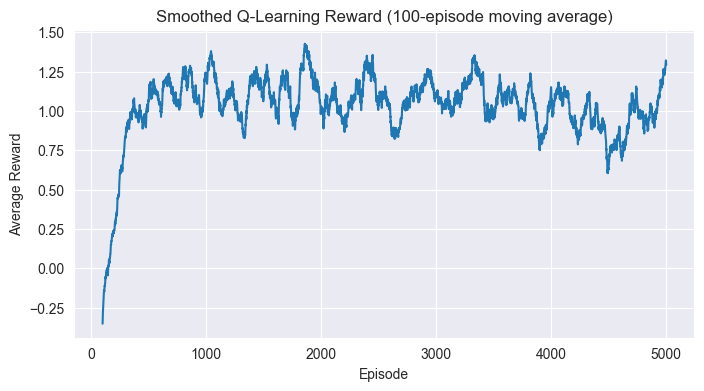

In [25]:
pd.Series(rewards).rolling(100).mean().plot(figsize=(8,4))
plt.title("Smoothed Q-Learning Reward (100-episode moving average)")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()


## PERFORMANCE EVALUATION

In [26]:
# Select high-value (subscribed) users
high_value_users = encoded_data[encoded_data['Subscribed_flag'] == 1]

# Use only the columns used in the RL state
X_high_value = high_value_users[optimal_features]
X_high_value_scaled = scaler.transform(X_high_value)  # use same scaler as training

action_counts = {a: 0 for a in ACTIONS}

for i in range(len(X_high_value_scaled)):
    state = X_high_value_scaled[i]
    action = agent.choose_action(state)
    action_counts[ACTIONS[action]] += 1

action_counts = pd.Series(action_counts).sort_values(ascending=False)
action_counts

send_demo_invite          306
nudge_platform_signup     229
assign_account_manager    215
do_nothing                144
send_survey               129
schedule_first_call        75
dtype: int64

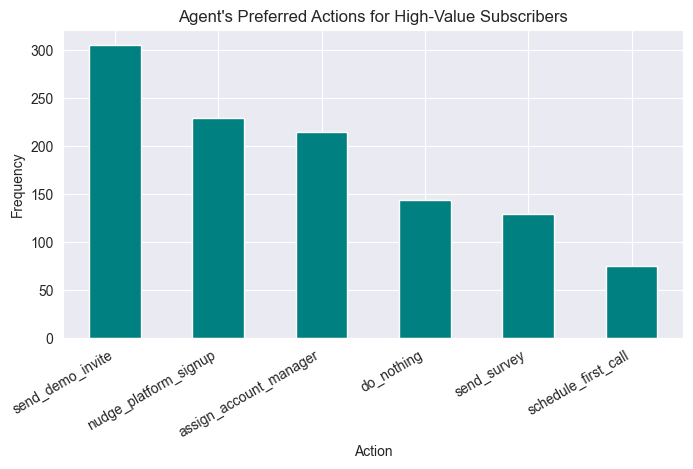

In [27]:
plt.figure(figsize=(8,4))
action_counts.plot(kind='bar', color='teal')
plt.title("Agent's Preferred Actions for High-Value Subscribers")
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.xticks(rotation=30, ha='right')
plt.show()

In [28]:
subscribed_users = data_balanced[data_balanced['Subscribed_flag'] == 1]
non_subscribed_users = data_balanced[data_balanced['Subscribed_flag'] == 0]

# Compare key attributes
for col in ['Country', 'Education', 'Stage', 'Status']:
    print(f"\n{col} Distribution Among Subscribers:")
    print(subscribed_users[col].value_counts(normalize=True).head(5))


Country Distribution Among Subscribers:
Country
USA             0.611047
Canada          0.135788
Saudi Arabia    0.074799
Australia       0.057537
Colombia        0.031070
Name: proportion, dtype: float64

Education Distribution Among Subscribers:
Education
B27    0.670330
B11    0.208791
B30    0.068132
B8     0.052747
Name: proportion, dtype: float64

Stage Distribution Among Subscribers:
Stage
subscribed already    1.0
Name: proportion, dtype: float64

Status Distribution Among Subscribers:
Status
2nd message    0.477740
1st message    0.424658
3rd message    0.097603
Name: proportion, dtype: float64


In [29]:
state_values = []
states = np.array(X_scaled)  # your scaled features

for i in range(len(states)):
    s_key = agent._discretize(states[i])
    if s_key in agent.q_table:
        q_vals = agent.q_table[s_key]
        max_q = np.max(q_vals)
    else:
        max_q = 0
    state_values.append(max_q)

data_balanced['expected_reward'] = state_values

In [30]:
data_balanced

,ID,Country,Education,First Contact,Last Contact,Status,Stage,First Call,Signed up for a demo,Filled in customer survey,Did sign up to the platform,Account Manager assigned,Subscribed,Subscribed_flag,expected_reward
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-27,NaN,NaN,0,0.264170
1,2,Austria,NaN,NaN,NaN,NaN,NaN,2022-04-28,2022-04-25,2022-04-25,2022-04-25,NaN,NaN,0,0.000000
2,3,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-24,NaN,NaN,NaN,NaN,0,0.268161
3,4,France,NaN,NaN,NaN,NaN,NaN,2022-04-22,2022-04-20,2022-04-20,2022-04-22,2022-04-22,NaN,0,0.359125
4,5,USA,NaN,NaN,NaN,NaN,NaN,2022-04-23,2022-04-19,2022-04-19,NaN,NaN,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,7768,NaN,NaN,2020-05-13,2020-05-13,NaN,subscribed already,2021-03-18,NaN,NaN,2021-03-17,2021-03-31,2021-04-13,1,1.872221
112,113,NaN,NaN,NaN,NaN,NaN,subscribed already,2022-01-17,2022-01-15,2022-01-15,NaN,2022-01-26,2022-01-31,1,1.068978
120,121,USA,NaN,NaN,NaN,NaN,subscribed already,2022-01-08,2022-01-05,2022-01-06,2022-01-06,2022-01-10,2022-01-15,1,1.789629
363,366,USA,B11,2021-06-23,2021-06-23,2nd message,subscribed already,2021-06-28,NaN,NaN,2021-06-28,2021-07-19,2021-07-18,1,1.768740


In [31]:
high_value_states = data_balanced.sort_values(by='expected_reward', ascending=False).head(500)
for col in ['Country', 'Education', 'Stage', 'Status']:
    print(f"\n{col} among high-value users:")
    print(high_value_states[col].value_counts(normalize=True).head(5))


Country among high-value users:
Country
USA             0.483010
Canada          0.182039
Saudi Arabia    0.157767
Colombia        0.065534
China           0.060680
Name: proportion, dtype: float64

Education among high-value users:
Education
B27    0.545455
B11    0.313636
B30    0.140909
Name: proportion, dtype: float64

Stage among high-value users:
Stage
subscribed already    1.0
Name: proportion, dtype: float64

Status among high-value users:
Status
2nd message    0.516854
1st message    0.370787
3rd message    0.112360
Name: proportion, dtype: float64


<Axes: xlabel='reward_segment', ylabel='expected_reward'>

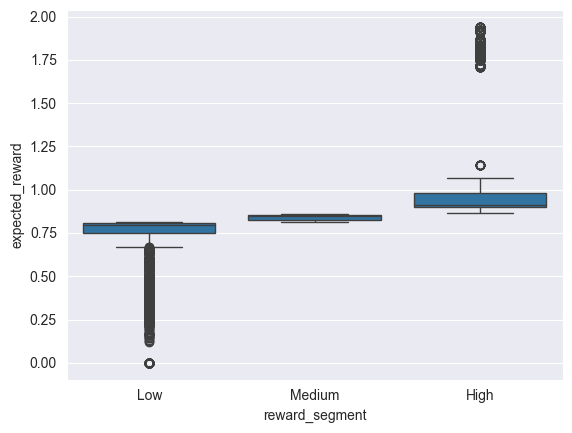

In [32]:
data_balanced['reward_segment'] = pd.qcut(data_balanced['expected_reward'], q=3, labels=['Low', 'Medium', 'High'])
sns.boxplot(data=data_balanced, x='reward_segment', y='expected_reward')


## BUSINESS RECOMMENDATIONS

- The segment for the client to prioritize are customers that are from he USA, have a B27 education level and are subscribers by the second message.
- The USA generates above 50% high-value customers, i.e. "leads" among the client's global base compared to other country-wise segments.
- Based on defined set of actions, sending demo invites to the customers has the potential to generate the highest sales followed by nudging the platform signup.
- A possible reason could be that high-valued leads, or even the potentials gravitate strongly towards the product when have a better visual idea via live demos.
- Live demos also might help signficantly in bridging the communication gap with customers - something that signficantly reduce attrition and increase retention.
- N the platform signup for new users - while not a very robust action from the security standpoint, immediately hooks the users to the product.
- So, a tradeoff strategy could be developed where users can has a trail period and then prompted towards paid subscription.


